In [12]:
%matplotlib inline
import matplotlib as mpl
# from matplotlib import style
# style.use('fivethirtyeight')

In [13]:
import numpy as np
import pandas as pd
import datetime as dt

In [14]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
engine = create_engine("sqlite:///../Resources/energy.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['totalconsumption',
 'hydrogeneration',
 'solargeneration',
 'solarchange',
 'geography',
 'windgeneration',
 'hydrochange',
 'windchange']

In [18]:
# Save references to each table
geography = Base.classes.geography
hydrochange = Base.classes.hydrochange
hydrogeneration = Base.classes.hydrogeneration
solarchange = Base.classes.solarchange
solargeneration = Base.classes.solargeneration
windchange = Base.classes.windchange
totalconsumption = Base.classes.totalconsumption
windgeneration = Base.classes.windgeneration

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [20]:
# Inspect the tables to get the column names
inspector = sqlalchemy.inspect(engine)
columns = inspector.get_columns('geography')
print("Geography Columns")
for column in columns:
    print('-',column["name"],'-',column["type"])
print("\nhydrochange Columns")
columns = inspector.get_columns('hydrochange')
for column in columns:
    print('-',column["name"],'-', column["type"])
print("\nhydrogeneration Columns")
columns = inspector.get_columns('hydrogeneration')
for column in columns:
    print('-',column["name"],'-', column["type"])
print("\nsolarchange columns")
columns = inspector.get_columns('solarchange')
for column in columns:
    print('-',column["name"],'-', column["type"])
print("\nsolargeneration Columns")
columns = inspector.get_columns('solargeneration')
for column in columns:
    print('-',column["name"],'-', column["type"])
print("\n windchange Columns")
columns = inspector.get_columns('windchange')
for column in columns:
    print('-',column["name"],'-', column["type"])
print("\nTotal Consumption Columns")
columns = inspector.get_columns('totalconsumption')
for column in columns:
    print('-',column["name"],'-', column["type"])
print("\nWind Generation Columns")
columns = inspector.get_columns('windgeneration')
for column in columns:
    print('-',column["name"],'-', column["type"])

Geography Columns
- id - INTEGER
- name - VARCHAR(128)
- alpha2 - VARCHAR(2)
- alpha3 - VARCHAR(3)
- region - VARCHAR(128)
- subregion - VARCHAR(128)
- region_code - INTEGER
- subregion_code - INTEGER

hydrochange Columns
- id - INTEGER
- country_code - VARCHAR(3)
- year - INTEGER
- quantity - FLOAT

hydrogeneration Columns
- id - INTEGER
- country_code - VARCHAR(3)
- year - INTEGER
- quantity - FLOAT

solarchange columns
- id - INTEGER
- country_code - VARCHAR(3)
- year - INTEGER
- quantity - FLOAT

solargeneration Columns
- id - INTEGER
- country_code - VARCHAR(3)
- year - INTEGER
- quantity - FLOAT

 windchange Columns
- id - INTEGER
- country_code - VARCHAR(3)
- year - INTEGER
- quantity - FLOAT

Total Consumption Columns
- id - INTEGER
- country_code - VARCHAR(3)
- year - INTEGER
- quantity - FLOAT

Wind Generation Columns
- id - INTEGER
- country_code - VARCHAR(3)
- year - INTEGER
- quantity - FLOAT


In [21]:
geography_data = session.query(geography.id, geography.name, geography.alpha2, geography.alpha3, geography.region, geography.subregion, geography.region_code, geography.subregion_code)
hydrochange_data = session.query(hydrochange.id, hydrochange.country_code,hydrochange.year, hydrochange.quantity)
hydrogeneration_data = session.query(hydrogeneration.id,hydrogeneration.country_code,hydrogeneration.year, hydrogeneration.quantity)
solarchange_data = session.query(solarchange.id,solarchange.country_code, solarchange.year, solarchange.quantity)
solargeneration_data = session.query(solargeneration.id,solargeneration.country_code, solargeneration.year,  solargeneration.quantity)
windchange_data = session.query(windchange.id,windchange.country_code, windchange.year,  windchange.quantity)
windgeneration_data = session.query(windgeneration.id,windgeneration.country_code, windgeneration.year,  windgeneration.quantity)
totalconsumption_data = session.query(totalconsumption.id,totalconsumption.country_code,totalconsumption.year,  totalconsumption.quantity)


In [22]:
df1 = pd.DataFrame(geography_data, columns =['id', 'name', 'alpha2', 'alpha3', 'region','subregion', 'region_code', 'subregion_code'])
df1.head(10)


,id,name,alpha2,alpha3,region,subregion,region_code,subregion_code
0,1,Afghanistan,AF,AFG,Asia,Southern Asia,142,34
1,2,Åland Islands,AX,ALA,Europe,Northern Europe,150,154
2,3,Albania,AL,ALB,Europe,Southern Europe,150,39
3,4,Algeria,DZ,DZA,Africa,Northern Africa,2,15
4,5,American Samoa,AS,ASM,Oceania,Polynesia,9,61
5,6,Andorra,AD,AND,Europe,Southern Europe,150,39
6,7,Angola,AO,AGO,Africa,Sub-Saharan Africa,2,202
7,8,Anguilla,AI,AIA,Americas,Latin America and the Caribbean,19,419
8,9,Antarctica,AQ,ATA,,,,
9,10,Antigua and Barbuda,AG,ATG,Americas,Latin America and the Caribbean,19,419


In [31]:

df2 = pd.DataFrame(hydrochange_data, columns =['id', 'country_code', 'year', 'quantity'])
df2.head(10)

,id,country_code,year,quantity
0,1,DZA,2000,-0.440591
1,2,DZA,2001,0.043030
2,3,DZA,2002,-0.036334
3,4,DZA,2003,0.602159
4,5,DZA,2004,-0.045238
5,6,DZA,2005,0.866759
6,7,DZA,2006,-0.970894
7,8,DZA,2007,0.019882
8,9,DZA,2008,0.156204
9,10,DZA,2009,0.159861


In [56]:
df22 = df2.filter["country_code"],sum["quantity"]
df22

TypeError: 'method' object is not subscriptable

In [50]:
df22 = df2.filterby(["country_code"])
df22.head()

AttributeError: 'DataFrame' object has no attribute 'filterby'

In [57]:
sum?


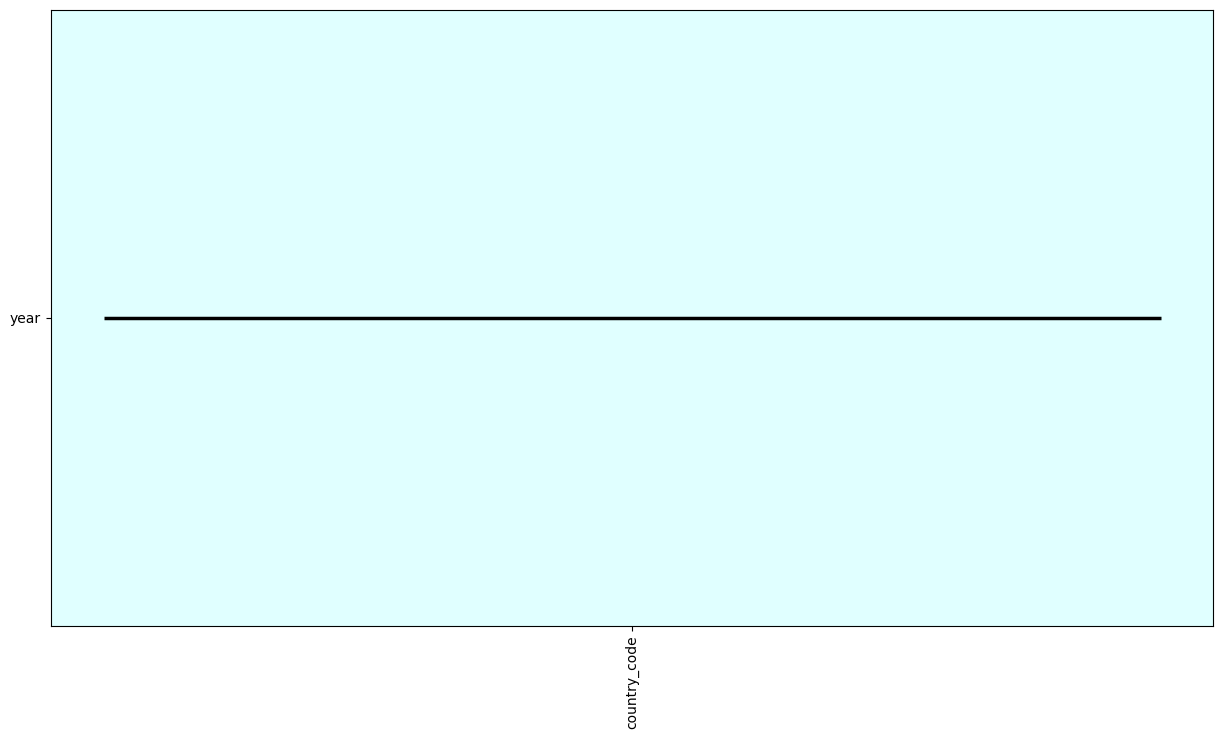

In [46]:
x= 'country_code'
y= 'year'
h = '.'
mpl.pyplot.figure(figsize=(15, 8))
# color = mpl.cm.cool(np.linspace(.1, 1, 31))
mpl.pyplot.rcParams['axes.facecolor'] = 'lightcyan'
mpl.pyplot.bar(x, y, align='center',hatch=h,color='pink', edgecolor="black", width= .5, linewidth=2.5)
title = ""
xl= ""
yl= ""
mpl.pyplot.xticks(x, rotation='vertical')
mpl.pyplot.title(title, fontsize = 17)
mpl.pyplot.xlabel(xl, fontsize = 17)
mpl.pyplot.ylabel(yl, fontsize = 17) 



mpl.pyplot.show()

In [13]:
df3 = pd.DataFrame(hydrogeneration_data, columns =['id', 'country_code','year', 'quantity'])
df3.head(10)

,id,country_code,year,quantity
0,1,DZA,1965,0.400
1,2,DZA,1966,0.355
2,3,DZA,1967,0.410
3,4,DZA,1968,0.563
4,5,DZA,1969,0.361
5,6,DZA,1970,0.580
6,7,DZA,1971,0.330
7,8,DZA,1972,0.495
8,9,DZA,1973,0.752
9,10,DZA,1974,0.497


In [14]:

df4 = pd.DataFrame(solarchange_data, columns =['id', 'country_code','year', 'quantity'])
df4.head(10)

,id,country_code,year,quantity
0,1,DZA,1966,0.0
1,2,DZA,1967,0.0
2,3,DZA,1968,0.0
3,4,DZA,1969,0.0
4,5,DZA,1970,0.0
5,6,DZA,1971,0.0
6,7,DZA,1972,0.0
7,8,DZA,1973,0.0
8,9,DZA,1974,0.0
9,10,DZA,1975,0.0


In [15]:
df5 = pd.DataFrame(solargeneration_data , columns =['id', 'country_code','year', 'quantity'])
df5.head(10)

,id,country_code,year,quantity
0,1,DZA,1965,0.0
1,2,DZA,1966,0.0
2,3,DZA,1967,0.0
3,4,DZA,1968,0.0
4,5,DZA,1969,0.0
5,6,DZA,1970,0.0
6,7,DZA,1971,0.0
7,8,DZA,1972,0.0
8,9,DZA,1973,0.0
9,10,DZA,1974,0.0


In [16]:
df6 = pd.DataFrame(windchange_data, columns =['id', 'country_code','year', 'quantity'])
df6.head(10)

,id,country_code,year,quantity
0,1,DZA,1966,0.0
1,2,DZA,1967,0.0
2,3,DZA,1968,0.0
3,4,DZA,1969,0.0
4,5,DZA,1970,0.0
5,6,DZA,1971,0.0
6,7,DZA,1972,0.0
7,8,DZA,1973,0.0
8,9,DZA,1974,0.0
9,10,DZA,1975,0.0


In [17]:
df7 = pd.DataFrame(windgeneration, columns =['id', 'country_code','year', 'quantity'])
df7.head(10)

,id,country_code,year,quantity
0,1,AFG,2000,0.0
1,2,AFG,2001,0.0
2,3,AFG,2002,0.0
3,4,AFG,2003,0.0
4,5,AFG,2004,0.0
5,6,AFG,2005,0.0
6,7,AFG,2006,0.0
7,8,AFG,2007,0.0
8,9,AFG,2008,0.0
9,10,AFG,2009,0.0


In [18]:
df8 = pd.DataFrame(totalconsumption, columns =['id', 'country_code','year', 'quantity'])
df8.tail(10)

,id,country_code,year,quantity
4289,4290,OWID_WRL,2012,146715.50
4290,4291,OWID_WRL,2013,149322.75
4291,4292,OWID_WRL,2014,150977.92
4292,4293,OWID_WRL,2015,152260.60
4293,4294,OWID_WRL,2016,154418.78
4294,4295,OWID_WRL,2017,157406.34
4295,4296,OWID_WRL,2018,161772.62
4296,4297,OWID_WRL,2019,163173.95
4297,4298,OWID_WRL,2020,156669.94
4298,4299,OWID_WRL,2021,165319.69
